In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 4# MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 20 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

setting up xvel
setting up yvel
setting up zvel
setting up roll


/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x103e415c0> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x103e415c0> is already entered
Exception in callback

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=79, step=2), IntSlider(value=0,…

setting up xvel


/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


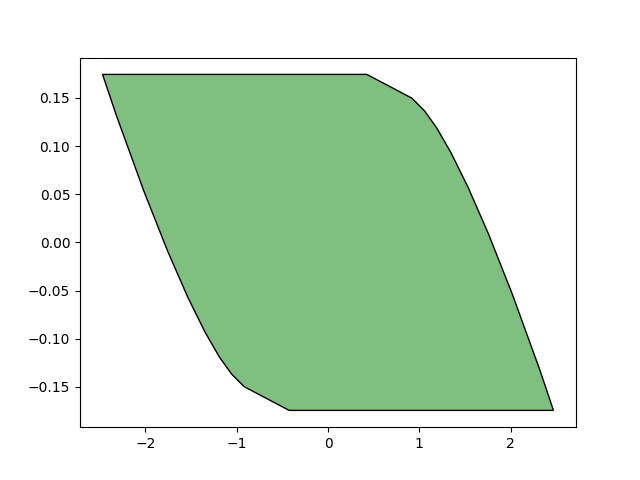

In [ ]:
# invariant set plot

from LinearMPC.MPCControl_xvel import MPCControl_xvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
# omega_y, beta, v_x
x0 = np.array([0, 0, 0])
u0, x_traj, u_traj = mpc_x.get_u(x0) # x and u for single subsystem

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mpc_x.O_inf.projection(dims=(0,1)).plot(ax, color='g', opacity=0.5, show_vertices=False)



In [11]:
Ts = 0.05
sim_time = 5
H = 4.0
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 40 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.        0.        0.        2.       ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.05: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.09806   0.        0.        2.0024515]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.10: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.19612   0.        0.        2.009806 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.15: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.29418   0.        0.        2.0220635]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.20: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.39224   0.        0.        2.039224 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.25: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.4903    0.        0.        2.0612875]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.30: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.58836   0.        0.        2.088254 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.35: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.68642   0.        0.        2.1201235]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.40: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.78448   0.        0.        2.156896 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.45: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.88254   0.        0.        2.1985715]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.50: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        0.9806    0.        0.        2.24515  ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.55: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.07866   0.        0.        2.2966315]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.60: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.17672   0.        0.        2.353016 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.65: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.27478   0.        0.        2.4143035]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.70: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.37284   0.        0.        2.480494 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.75: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.4709    0.        0.        2.5515875]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.80: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.56896   0.        0.        2.627584 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.85: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.66702   0.        0.        2.7084835]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.90: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.76508   0.        0.        2.794286 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 0.95: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.86314   0.        0.        2.8849915]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.00: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        1.9612    0.        0.        2.9806   ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.05: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.05926   0.        0.        3.0811115]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.10: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.15732   0.        0.        3.186526 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.15: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.25538   0.        0.        3.2968435]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.20: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.35344   0.        0.        3.412064 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.25: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.4515    0.        0.        3.5321875]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.30: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.54956   0.        0.        3.657214 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.35: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.64762   0.        0.        3.7871435]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.40: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.74568   0.        0.        3.921976 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.45: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.84374   0.        0.        4.0617115]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.50: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        2.9418    0.        0.        4.20635  ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.55: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.03986   0.        0.        4.3558915]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.60: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.13792   0.        0.        4.510336 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.65: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.23598   0.        0.        4.6696835]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.70: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.33404   0.        0.        4.833934 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.75: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.4321    0.        0.        5.0030875]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.80: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.53016   0.        0.        5.177144 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.85: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.62822   0.        0.        5.3561035]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.90: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.72628   0.        0.        5.539966 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 1.95: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions


x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.82434   0.        0.        5.7287315]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.00: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        3.9224    0.        0.        5.9224   ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.05: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.        0.        0.        0.        0.        0.6981317 0.
 0.        4.02046   0.        0.        6.1209715]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.10: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.11798924 0.         0.         6.32443273]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.15: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.21392772 0.         0.         6.53273066]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.20: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.3083014  0.         0.         6.74578638]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.25: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.4011358  0.         0.         6.96352231]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.30: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.49245603 0.         0.         7.18586211]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.35: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.58228677 0.         0.         7.41273068]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.40: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.67065234 0.         0.         7.64405416]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.45: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.75757661 0.         0.         7.87975988]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.50: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.84308311 0.         0.         8.11977637]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.55: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         4.92719496 0.         0.         8.36403333]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.60: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.0099349  0.         0.         8.61246157]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.65: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.09132532 0.         0.         8.86499308]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.70: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.17138821 0.         0.         9.12156092]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.75: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.25014524 0.         0.         9.38209925]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.80: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.32761771 0.         0.         9.64654333]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.85: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [0.         0.         0.         0.         0.         0.6981317
 0.         0.         5.40382656 0.         0.         9.91482943]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.90: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.4787924   0.          0.         10.18689491]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 2.95: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.55253552  0.          0.         10.4626781 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.00: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.62507585  0.          0.         10.74211839]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.05: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.69643301  0.          0.         11.02515611]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.10: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.7666263   0.          0.         11.31173259]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.15: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.83567471  0.          0.         11.60179012]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.20: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.9035969   0.          0.         11.89527191]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.25: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          5.97041124  0.          0.         12.19212211]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.30: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.03613582  0.          0.         12.49228579]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.35: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.10078839  0.          0.         12.79570889]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.40: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.16438644  0.          0.         13.10233826]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.45: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.22694719  0.          0.         13.41212161]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.50: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.28848753  0.          0.         13.72500747]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.55: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.34902412  0.          0.         14.04094526]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.60: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.40857333  0.          0.         14.3598852 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.65: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.46715126  0.          0.         14.68177832]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.70: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.52477376  0.          0.         15.00657644]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.75: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.58145641  0.          0.         15.3342322 ]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.80: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.63721453  0.          0.         15.66469897]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.85: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.69206322  0.          0.         15.99793091]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.90: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.74601729  0.          0.         16.33388293]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 3.95: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.79909135  0.          0.         16.67251064]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.00: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.85129974  0.          0.         17.01377042]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.05: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.90265659  0.          0.         17.35761933]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.10: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          6.95317578  0.          0.         17.70401514]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.15: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.00287098  0.          0.         18.05291631]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.20: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.05175563  0.          0.         18.40428197]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.25: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.09984294  0.          0.         18.75807193]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.30: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.14714593  0.          0.         19.11424666]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.35: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.19367738  0.          0.         19.47276724]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.40: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.23944988  0.          0.         19.83359542]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.45: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.28447581  0.          0.         20.19669356]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.50: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.32876734  0.          0.         20.56202464]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.55: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.37233646  0.          0.         20.92955224]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.60: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.41519494  0.          0.         21.29924052]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.65: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.45735438  0.          0.         21.67105425]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.70: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.49882618  0.          0.         22.04495877]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.75: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions


x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.53962155  0.          0.         22.42091996]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.80: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.57975153  0.          0.         22.79890429]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.85: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.61922697  0.          0.         23.17887875]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.90: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(
/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.65805855  0.          0.         23.56081089]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]
Simulating time 4.95: 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



x_state: [ 0.          0.          0.          0.          0.          0.6981317
  0.          0.          7.69625677  0.          0.         23.94466877]
x_target: [ 0.         0.         0.         0.         0.         0.6981317
  0.         0.        10.         0.         0.         2.       ]


/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…